# Business Understanding

In [2]:
import findspark
findspark.init()

findspark.find()
import pyspark
findspark.find()

import plotly
plotly.__version__

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [3]:
sc = pyspark.SparkContext(appName="Business_Understanding")
spark = SparkSession(sc)

In [4]:
# using SQLContext to read parquet file
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

# to read parquet file
telemetry = sqlContext.read.parquet("../Python/input/PdM_telemetry.parquet")
errors = sqlContext.read.parquet("../Python/input/PdM_errors.parquet")
maint = sqlContext.read.parquet("../Python/input/PdM_maint.parquet")
failures = sqlContext.read.parquet("../Python/input/PdM_failures.parquet")
machines = sqlContext.read.parquet("../Python/input/PdM_machines.parquet")

## Telemetry
The first data source is the telemetry time-series data which consists of voltage, rotation, pressure, and vibration measurements collected from 100 machines in real time averaged over every hour collected during the year 2015. Below, we display the first 10 records in the dataset. A summary of the whole dataset is also provided.

In [6]:
def telemetry_plot(machine, date_from, date_to):
    """Append features from columns to the features vector.

    Parameters
    ----------
    df : pyspark.sql.DataFrame
    cols : list of str

    Returns
    -------
    pyspark.sql.DataFrame
    """
    
    plot_df = telemetry.filter(telemetry.machineID == machine).where((telemetry.datetime > date_from) & (telemetry.datetime < date_to)).select(telemetry.datetime, telemetry.volt)
    data = [go.Scatter(x = plot_df.toPandas().datetime, y=plot_df.toPandas()['volt'])]
    return iplot(data)
    

In [7]:
telemetry_plot(machine = 1, date_from = '2015-01-01', date_to = '2015-02-01')

## Errors
The second major data source is the error logs. These are non-breaking errors thrown while the machine is still operational and do not constitute as failures. The error date and times are rounded to the closest hour since the telemetry data is collected at an hourly rate.

In [10]:
errors.createOrReplaceTempView("errors")
data = spark.sql("""SELECT COUNT(datetime) as Total_Error, errorID 
                 FROM errors
                 GROUP BY errorID""")


In [13]:
trace = [go.Pie(labels = data.toPandas().errorID, values= data.toPandas().Total_Error)]
iplot(trace)

## Maintenance

These are the scheduled and unscheduled maintenance records which correspond to both regular inspection of components as well as failures. A record is generated if a component is replaced during the scheduled inspection or replaced due to a breakdown. The records that are created due to breakdowns will be called failures which is explained in the later sections. Maintenance data has both 2014 and 2015 records.

In [14]:
maint.createOrReplaceTempView("maint")
data = spark.sql("""SELECT COUNT(datetime) as Total_Error, comp 
                 FROM maint
                 GROUP BY comp""")

trace = [go.Pie(labels = data.toPandas().comp, values= data.toPandas().Total_Error)]
iplot(trace)

## Machines
This data set includes some information about the machines: model type and age (years in service).

In [12]:
machines.show(30)

+---------+------+---+
|machineID| model|age|
+---------+------+---+
|        1|model3| 18|
|        2|model4|  7|
|        3|model3|  8|
|        4|model3|  7|
|        5|model3|  2|
|        6|model3|  7|
|        7|model3| 20|
|        8|model3| 16|
|        9|model4|  7|
|       10|model3| 10|
|       11|model2|  6|
|       12|model3|  9|
|       13|model1| 15|
|       14|model3|  1|
|       15|model3| 14|
|       16|model1|  3|
|       17|model1| 14|
|       18|model3| 15|
|       19|model3| 17|
|       20|model2| 16|
|       21|model2| 14|
|       22|model1| 14|
|       23|model1| 17|
|       24|model1| 20|
|       25|model4| 16|
|       26|model3|  3|
|       27|model3|  9|
|       28|model4|  1|
|       29|model4|  3|
|       30|model3| 20|
+---------+------+---+
only showing top 30 rows



In [16]:
from plotly import tools

trace0 = go.Histogram(
    nbinsx = 5,
    x = machines.filter(machines.machineID == 1).toPandas().age,
    opacity=0.75,
    autobinx = False
)
trace1 = go.Histogram(
    nbinsx = 5,
    x = machines.filter(machines.machineID == 2).toPandas().age,
    opacity=0.75,
    autobinx = False
)
trace2 = go.Histogram(
    nbinsx = 5,
    x = machines.filter(machines.machineID == 3).toPandas().age,
    opacity=0.75,
    autobinx = False
)
trace3 = go.Histogram(
    nbinsx = 5,
    x = machines.filter(machines.machineID == 4).toPandas().age,
    opacity=0.75,
    autobinx = False
)
trace4 = go.Histogram(
    nbinsx = 5,
    x = machines.filter(machines.machineID == 5).toPandas().age,
    opacity=0.75,
    autobinx = False
)

fig = tools.make_subplots(rows=3, cols=2)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)

#data = [trace1, trace2, trace3, trace4, trace5]

#layout = go.Layout(barmode='stack')

#fig = go.Figure(data=data, layout=layout)

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5 ]  [ (3,2) x6,y6 ]



In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


machines_pandas = machines.toPandas()

machines_pandas.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


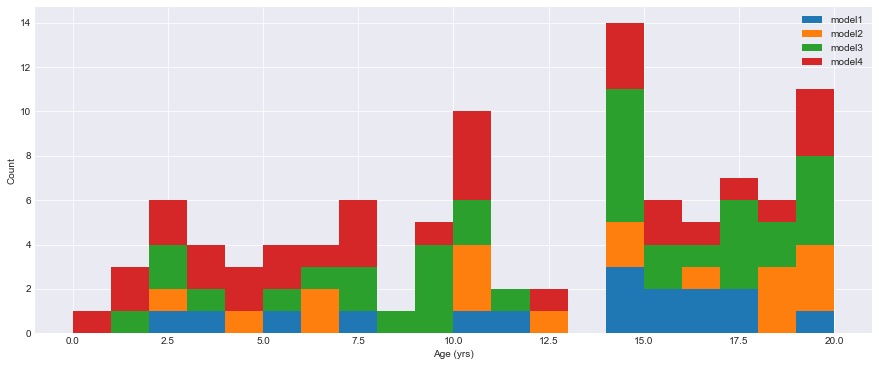

In [22]:
machines_pandas['model'] = machines_pandas['model'].astype('category')
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
_, bins, _ = plt.hist([machines_pandas.loc[machines_pandas['model'] == 'model1', 'age'],
                       machines_pandas.loc[machines_pandas['model'] == 'model2', 'age'],
                       machines_pandas.loc[machines_pandas['model'] == 'model3', 'age'],
                       machines_pandas.loc[machines_pandas['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

## Failures
These are the records of component replacements due to failures. Each record has a date and time, machine ID, and failed component type.

In [15]:
failures.createOrReplaceTempView("failures")
data = spark.sql("""SELECT COUNT(datetime) as Total_Error, failure 
                 FROM failures
                 GROUP BY failure""")

trace = [go.Pie(labels = data.toPandas().failure, values= data.toPandas().Total_Error)]
iplot(trace)